In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/video-game-sales-analyze/vgsales new.csv")


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [4]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.0,0.01
16594,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.0,0.01
16595,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.0,0.01
16596,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.0,0.01
16597,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
invalid_rows=df[df['Platform'].str.isnumeric()]
#print(invalid_rows.to_string())

In [8]:
df['Platform']=df['Platform'].replace('2600','PC')


In [9]:
#Handling null values in year

#Find the mode of the year (most common year)
most_common_year=df['Year'].mode()[0]
print(f"The year with the most game published is {most_common_year}")

df['Year'].fillna(most_common_year,inplace=True)



The year with the most game published is 2009.0


In [10]:
print(df['Year'].isna().sum())

0


In [11]:
#Handling null values in Publisher
most_common_publisher=df['Publisher'].mode()[0]
print(f"The publisher who published the most games is {most_common_publisher}")

The publisher who published the most games is Electronic Arts


In [12]:
df['Publisher'].isna().sum()

58

In [13]:
# Fill missing Publisher values with the most common Publisher for each Platform-Genre combination
df['Publisher'] = df.groupby(['Platform', 'Genre'])['Publisher'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

In [14]:
df['Publisher'].isna().sum()

0

In [15]:
print(df['Year'].head())

0    1980.0
1    1980.0
2    1980.0
3    1980.0
4    1980.0
Name: Year, dtype: float64


In [16]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Year']=df['Year'].astype(int)

In [17]:
print(df['Year'])

0        1980
1        1980
2        1980
3        1980
4        1980
         ... 
16593    2009
16594    2009
16595    2009
16596    2009
16597    2009
Name: Year, Length: 16598, dtype: int64


In [18]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [19]:
#changing wide format into long format
df_melted = df.melt(id_vars=['Name','Platform', 'Genre', 'Publisher', 'Year'],
                   value_vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'],
                   var_name='Region',
                    value_name='Sales')

In [20]:
print(df_melted.head(20))

                           Name Platform     Genre     Publisher  Year  \
0                     Asteroids       PC   Shooter         Atari  1980   
1               Missile Command       PC   Shooter         Atari  1980   
2                       Kaboom!       PC      Misc    Activision  1980   
3                      Defender       PC      Misc         Atari  1980   
4                        Boxing       PC  Fighting    Activision  1980   
5                    Ice Hockey       PC    Sports    Activision  1980   
6                       Freeway       PC    Action    Activision  1980   
7                        Bridge       PC      Misc    Activision  1980   
8                      Checkers       PC      Misc         Atari  1980   
9                      Pitfall!       PC  Platform    Activision  1981   
10                      Frogger       PC    Action  Parker Bros.  1981   
11                 Demon Attack       PC   Shooter        Imagic  1981   
12  E.T.: The Extra Terrestrial       

In [21]:
df['Decade'] = (df['Year'] // 10) * 10

In [22]:
df['NA_Share'] = df['NA_Sales'] / df['Global_Sales']
df['EU_Share'] = df['EU_Sales'] / df['Global_Sales']
df['JP_Share'] = df['JP_Sales'] / df['Global_Sales']
df['Other_Share'] = df['Other_Sales'] / df['Global_Sales']

In [23]:
#Success rate
df['IS_Hit'] = df['Global_Sales'] >= 1.0 

In [24]:
#top genres by region

region_genre=df_melted.groupby(['Genre', 'Region'])['Sales'].mean().unstack()

In [25]:
region_genre_percent = region_genre.div(region_genre.sum(axis=1), axis=0)

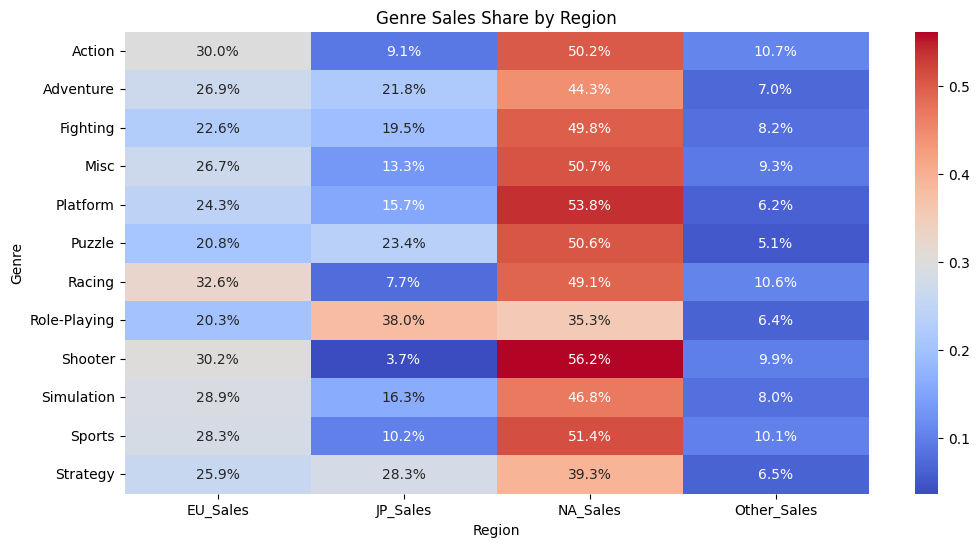

In [26]:


plt.figure(figsize=(12,6))
sns.heatmap(region_genre_percent, annot=True, fmt=".1%", cmap="coolwarm")
plt.title("Genre Sales Share by Region")
plt.show()

Genres That Perform Best (Highest Avg Sales)
NA_Sales	Platform (0.50), Shooter (0.44), Sports (0.29)
EU_Sales	Platform (0.22), Shooter (0.24), Racing (0.19)
JP_Sales	Role-Playing (0.24), Platform (0.15), Puzzle (0.10)
Other_Sales	Shooter (0.078), Platform (0.058), Racing (0.062)

In [27]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
PC       355.90
GBA      318.50
PSP      296.28
PS4      278.10
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [28]:
df.groupby(['Genre', 'Publisher'])['Global_Sales'].mean().sort_values(ascending=False).head(10)

Genre         Publisher                         
Action        Sony Computer Entertainment Europe    5.990000
              Palcom                                4.170000
Racing        Nintendo                              4.089189
Sports        Nintendo                              3.963818
Platform      Nintendo                              3.780796
Shooter       Microsoft Game Studios                3.409286
Role-Playing  Bethesda Softworks                    3.185882
Fighting      Nintendo                              2.963889
Simulation    Nintendo                              2.940345
Action        Hasbro Interactive                    2.795000
Name: Global_Sales, dtype: float64

Nintendo is dominating

<Axes: xlabel='Year'>

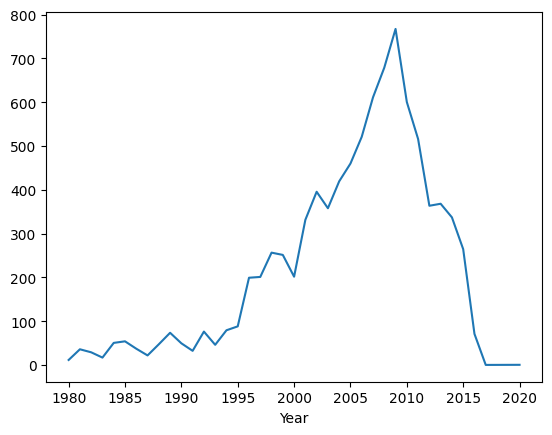

In [29]:
df.groupby('Year')['Global_Sales'].sum().plot()

In [30]:
platform_counts = df.groupby('Name')['Platform'].nunique()



In [31]:
df['Platform_Count'] = df['Name'].map(platform_counts)

In [32]:
sales_by_platform_count = df.groupby('Platform_Count')['Global_Sales'].mean().round(3).reset_index()


In [33]:
sales_by_platform_count.rename(columns = {'Global_Sales': 'Avg Global Sales(millions)'})





,Platform_Count,Avg Global Sales(millions)
0,1,0.486
1,2,0.502
2,3,0.542
3,4,0.640
4,5,0.814
5,6,0.738
6,7,0.831
7,8,0.880
8,9,1.152
9,10,1.173


In [34]:
print(sales_by_platform_count.columns)


Index(['Platform_Count', 'Global_Sales'], dtype='object')


As the Platform_Count increases, Global_Sales also increase.